# Example 2
## from pyteomics documentation
https://pyteomics.readthedocs.io/en/latest/examples/example_msms.html

In [2]:
from pyteomics import mgf, pepxml, mass, pylab_aux
import os
from urllib.request import urlopen, Request
import pylab

In [3]:
for fname in ('mgf', 'pep.xml'):
    if not os.path.isfile('example.' + fname):
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11'}
        url = 'http://pyteomics.readthedocs.io/en/latest/_static/example.' + fname
        request = Request(url, None, headers)
        target_name = 'example.' + fname
        with urlopen(request) as response, open(target_name, 'wb') as fout:
            print('Downloading ' + target_name + '...')
            fout.write(response.read())

In [4]:
with mgf.read('example.mgf') as spectra, pepxml.read('example.pep.xml') as psms:
    spectrum = next(spectra)
    psm = next(psms)

<Axes: title={'center': 'Experimental spectrum GPAAIQK'}, xlabel='m/z', ylabel='intensity'>

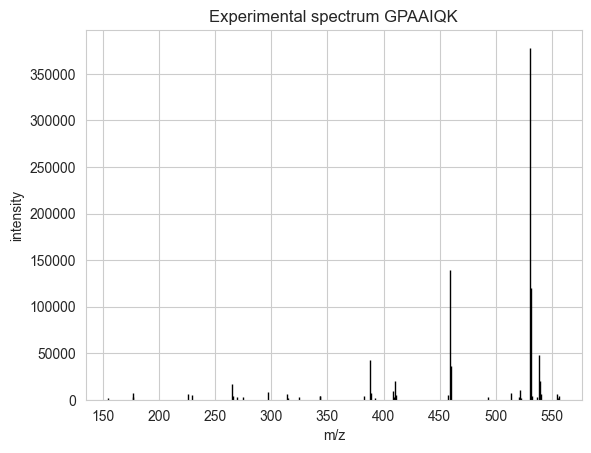

In [5]:
pylab.figure()
pylab_aux.plot_spectrum(spectrum, title="Experimental spectrum " + spectrum['params']['title'])

<Axes: title={'center': 'Annotated spectrum GPAAIQK'}, xlabel='m/z', ylabel='intensity'>

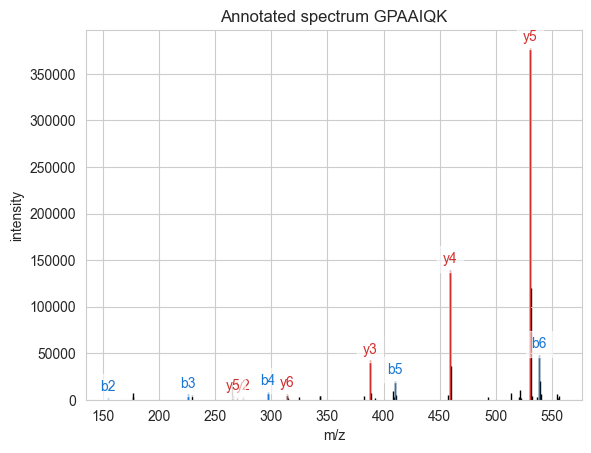

In [6]:
pylab.figure()
pylab_aux.annotate_spectrum(spectrum, psm['search_hit'][0]['peptide'],
    title='Annotated spectrum ' + psm['search_hit'][0]['peptide'],
    maxcharge=psm['assumed_charge'])

In [7]:
def fragments(peptide, types=('b', 'y'), maxcharge=1):
    """
    The function generates all possible m/z for fragments of types
    `types` and of charges from 1 to `maxharge`.
    """
    for i in range(1, len(peptide)):
        for ion_type in types:
            for charge in range(1, maxcharge+1):
                if ion_type[0] in 'abc':
                    yield mass.fast_mass(
                            peptide[:i], ion_type=ion_type, charge=charge)
                else:
                    yield mass.fast_mass(
                            peptide[i:], ion_type=ion_type, charge=charge)

In [8]:
fragment_list = list(fragments(psm['search_hit'][0]['peptide'], maxcharge=psm['assumed_charge']))
theor_spectrum = {'m/z array': fragment_list, 'intensity array': [spectrum['intensity array'].max()] * len(fragment_list)}

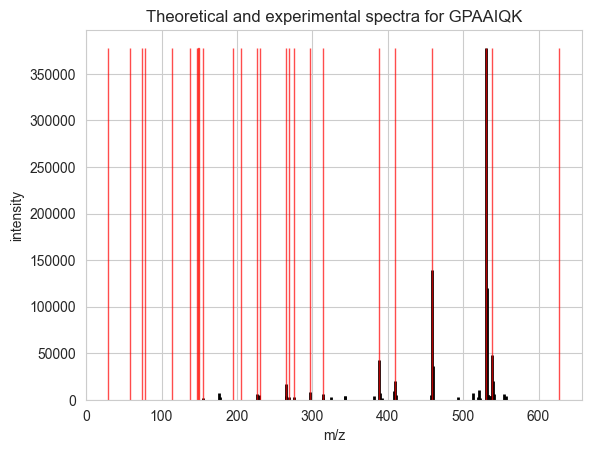

In [9]:
pylab.figure()
pylab.title('Theoretical and experimental spectra for ' + psm['search_hit'][0]['peptide'])
pylab_aux.plot_spectrum(spectrum, width=0.1, linewidth=2, edgecolor='black')
pylab_aux.plot_spectrum(theor_spectrum, width=0.1, edgecolor='red', alpha=0.7)
pylab.show()